## 特殊方法

Python解释器碰到特殊的句法时，会使用特殊方法去激活一些基本的对象操作，这些特殊方法的名字以两个下划线开头，以两个下划线结尾。

例如：__getitem__，obj[key]的背后就是__getitem__方法，为了能求得my_collection[key]的值，解释器实际上会调用my_collection.__getitem__(key).

**特殊方法**也叫**双下方法(dunder method)**

先来了解collections.namedtuple，主要用来构建**只有少数属性但是没有方法**的对象。

In [2]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

beer_card = Card('7', 'diamonds')

In [3]:
beer_card

Card(rank='7', suit='diamonds')

In [12]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = ['spades', 'diamonds', 'clubs', 'hearts']  # 注意这个常数属性的定义方式，直接放在class下面
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]  # 注意可以直接self.ranks来调用常数属性，已经两重循环的使用
        
    def __len__(self):
        """
        特殊方法，获取FrenchDeck的长度，可以直接调用 len(obj)
        """
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

In [13]:
deck = FrenchDeck()

In [14]:
deck.ranks

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

In [15]:
deck.suits

['spades', 'diamonds', 'clubs', 'hearts']

In [16]:
len(deck)

52

In [17]:
deck[0]

Card(rank='2', suit='spades')

随机抽取一张纸牌，可以使用Python内置的从序列中随机选出元素的函数，**random.choice**

In [18]:
from random import choice

a_list = ['music', 'movie', 'sports', 'games']
choice(a_list)

'sports'

In [19]:
choice(deck)

Card(rank='10', suit='spades')

In [37]:
choice(deck)

Card(rank='8', suit='spades')

- 因为__getitem__方法把 [ ] 操作交给了 self._cards 列表，所有deck类自动支持切片操作。 

In [39]:
deck[:3]  # 最上面3张牌

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [42]:
deck[12::13]  # a_list[start: end: step]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

- 变成可迭代的

In [43]:
for card in deck:
    if card[0] == 'A':
        print(card)

Card(rank='A', suit='spades')
Card(rank='A', suit='diamonds')
Card(rank='A', suit='clubs')
Card(rank='A', suit='hearts')


In [44]:
Card('Q', 'hearts') in deck

True

In [49]:
suit_values = dict(spades=3, hearts=2, clubs=1, diamonds=0)

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * 4 + suit_values[card.suit]

In [51]:
for card in sorted(deck, key=spades_high):
    print(card)

Card(rank='2', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='clubs')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='clubs')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='clubs')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='clubs')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='clubs')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='clubs')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='clubs')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='diamonds')

一个简单的例子说明其他特殊方法的实现

In [61]:
from math import hypot

class Vector:
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def __repr__(self):
        """
        字符串表示形式
        用%r暗示了构造函数只接受数值，不接受字符串
        """
        return 'Vector(%r, %r)' % (self.x, self.y)
    
    def __abs__(self):
        return hypot(self.x, self.y)
    
    def __bool__(self):
        return bool(abs(self))
    
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)
    

In [62]:
v1 = Vector(2, 4)

In [66]:
print(v1)

Vector(2, 4)


In [67]:
abs(v1)

4.47213595499958

In [68]:
v2 = Vector(3, 5)

In [69]:
v1 + v2

Vector(5, 9)

In [70]:
v1 * 2

Vector(4, 8)

In [73]:
if v1:
    print(v1)

Vector(2, 4)


In [74]:
bool(v1)

True

- 常用的特殊方法一览
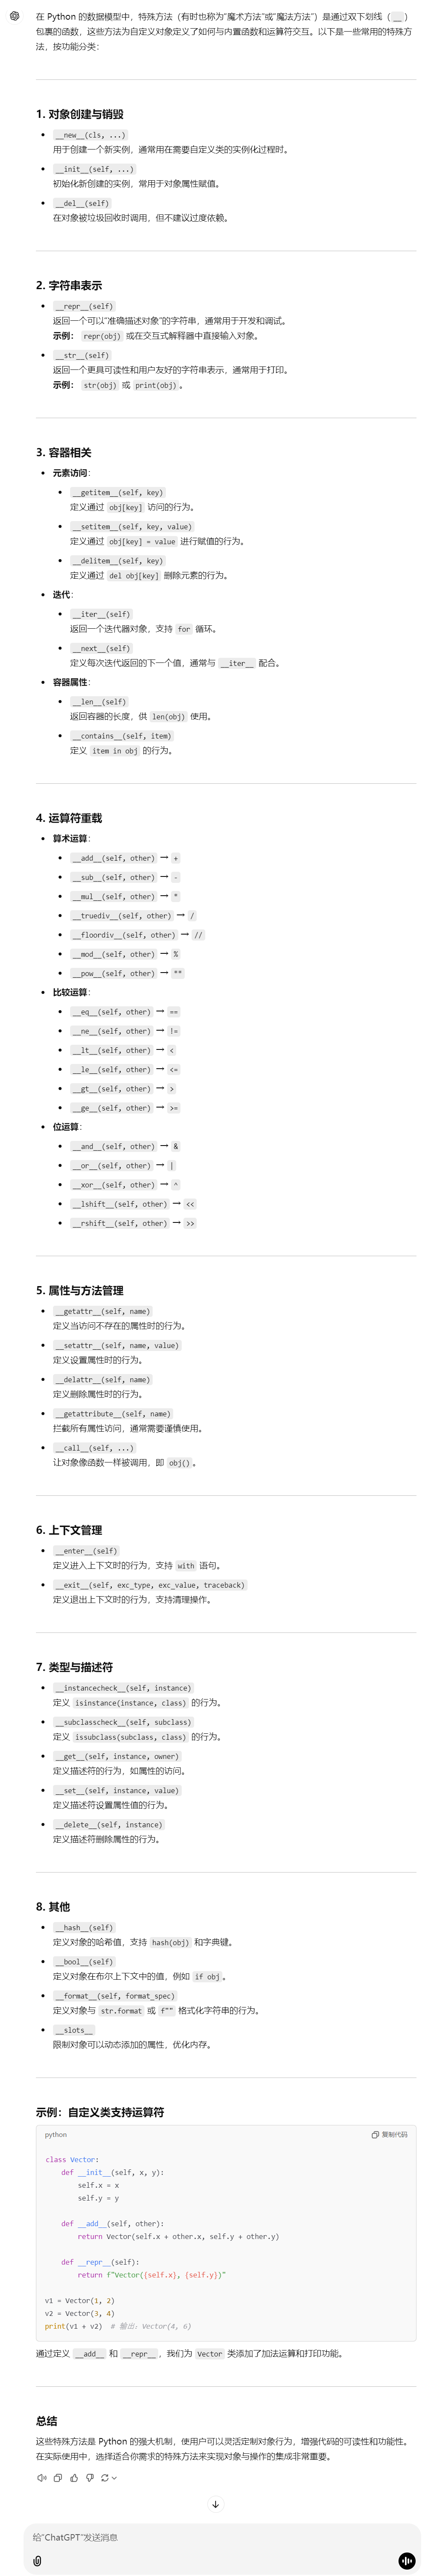